In [272]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

import tensorflow as tf 
from tensorflow import keras 
from keras import layers 

import warnings 
warnings.filterwarnings('ignore')


In [273]:
df = pd.read_csv(r"C:\Users\am421\Downloads\Vehicle MPG - 1984 to 2023.csv") 
df.head()


,ID,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,City MPG (Fuel Type 1),Highway MPG (Fuel Type 1),Combined MPG (Fuel Type 1),Fuel Type 2,...,Engine Description,Transmission,Vehicle Class,Time to Charge EV (hours at 120v),Time to Charge EV (hours at 240v),Range (for EV),City Range (for EV - Fuel Type 1),City Range (for EV - Fuel Type 2),Hwy Range (for EV - Fuel Type 1),Hwy Range (for EV - Fuel Type 2)
0,1,1985,Alfa Romeo,Spider Veloce 2000,14.167143,Regular Gasoline,19,25,21,NaN,...,(FFS),Manual 5-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0
1,2,1985,Bertone,X1/9,13.523182,Regular Gasoline,20,26,22,NaN,...,NaN,Manual 5-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0
2,3,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,15,21,17,NaN,...,(350 V8) (FFS),Automatic 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0
3,4,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,15,20,17,NaN,...,(350 V8) (FFS),Manual 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0
4,5,1985,Nissan,300ZX,18.594375,Regular Gasoline,15,18,16,NaN,...,"(GUZZLER) (FFS,TRBO)",Automatic 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0


In [274]:
# Calculate fuel efficiency using combined MPG
df['Fuel Efficiency (MPG)'] = df['Combined MPG (Fuel Type 1)']

# Print the updated dataset
df.head()

,ID,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,City MPG (Fuel Type 1),Highway MPG (Fuel Type 1),Combined MPG (Fuel Type 1),Fuel Type 2,...,Transmission,Vehicle Class,Time to Charge EV (hours at 120v),Time to Charge EV (hours at 240v),Range (for EV),City Range (for EV - Fuel Type 1),City Range (for EV - Fuel Type 2),Hwy Range (for EV - Fuel Type 1),Hwy Range (for EV - Fuel Type 2),Fuel Efficiency (MPG)
0,1,1985,Alfa Romeo,Spider Veloce 2000,14.167143,Regular Gasoline,19,25,21,NaN,...,Manual 5-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0,21
1,2,1985,Bertone,X1/9,13.523182,Regular Gasoline,20,26,22,NaN,...,Manual 5-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0,22
2,3,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,15,21,17,NaN,...,Automatic 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0,17
3,4,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,15,20,17,NaN,...,Manual 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0,17
4,5,1985,Nissan,300ZX,18.594375,Regular Gasoline,15,18,16,NaN,...,Automatic 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0,16


In [275]:
# CO2 emission factor for regular gasoline (example value, you should use the correct value for your specific fuel type)
co2_emission_factor = 19.6  # grams per gallon (example)

# Calculate fuel consumption in gallons per mile
df['Fuel Consumption (gallons/mile)'] = df['Estimated Annual Petrolum Consumption (Barrels)'] / 365  # assuming annual consumption is in barrels and there are 365 days in a year

# Calculate carbon emissions in grams per mile
df['Carbon Emissions (g/mile)'] = (df['Fuel Consumption (gallons/mile)'] * co2_emission_factor) / df['Fuel Efficiency (MPG)']

# Print the updated dataset with carbon emissions
df.head()

,ID,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,City MPG (Fuel Type 1),Highway MPG (Fuel Type 1),Combined MPG (Fuel Type 1),Fuel Type 2,...,Time to Charge EV (hours at 120v),Time to Charge EV (hours at 240v),Range (for EV),City Range (for EV - Fuel Type 1),City Range (for EV - Fuel Type 2),Hwy Range (for EV - Fuel Type 1),Hwy Range (for EV - Fuel Type 2),Fuel Efficiency (MPG),Fuel Consumption (gallons/mile),Carbon Emissions (g/mile)
0,1,1985,Alfa Romeo,Spider Veloce 2000,14.167143,Regular Gasoline,19,25,21,NaN,...,0,0.0,0,0.0,0.0,0.0,0.0,21,0.038814,0.036226
1,2,1985,Bertone,X1/9,13.523182,Regular Gasoline,20,26,22,NaN,...,0,0.0,0,0.0,0.0,0.0,0.0,22,0.037050,0.033008
2,3,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,15,21,17,NaN,...,0,0.0,0,0.0,0.0,0.0,0.0,17,0.047947,0.055280
3,4,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,15,20,17,NaN,...,0,0.0,0,0.0,0.0,0.0,0.0,17,0.047947,0.055280
4,5,1985,Nissan,300ZX,18.594375,Regular Gasoline,15,18,16,NaN,...,0,0.0,0,0.0,0.0,0.0,0.0,16,0.050943,0.062406


In [276]:
# Drop the specified columns
columns_to_drop = ['City MPG (Fuel Type 1)', 'Highway MPG (Fuel Type 1)', 'Combined MPG (Fuel Type 1)', 'Fuel Type 2','City MPG (Fuel Type 2)','Highway MPG (Fuel Type 2)','Combined MPG (Fuel Type 2)']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,ID,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,Engine Cylinders,Engine Displacement,Drive,Engine Description,...,Time to Charge EV (hours at 120v),Time to Charge EV (hours at 240v),Range (for EV),City Range (for EV - Fuel Type 1),City Range (for EV - Fuel Type 2),Hwy Range (for EV - Fuel Type 1),Hwy Range (for EV - Fuel Type 2),Fuel Efficiency (MPG),Fuel Consumption (gallons/mile),Carbon Emissions (g/mile)
0,1,1985,Alfa Romeo,Spider Veloce 2000,14.167143,Regular Gasoline,4.0,2.0,Rear-Wheel Drive,(FFS),...,0,0.0,0,0.0,0.0,0.0,0.0,21,0.038814,0.036226
1,2,1985,Bertone,X1/9,13.523182,Regular Gasoline,4.0,1.5,Rear-Wheel Drive,NaN,...,0,0.0,0,0.0,0.0,0.0,0.0,22,0.037050,0.033008
2,3,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,8.0,5.7,Rear-Wheel Drive,(350 V8) (FFS),...,0,0.0,0,0.0,0.0,0.0,0.0,17,0.047947,0.055280
3,4,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,8.0,5.7,Rear-Wheel Drive,(350 V8) (FFS),...,0,0.0,0,0.0,0.0,0.0,0.0,17,0.047947,0.055280
4,5,1985,Nissan,300ZX,18.594375,Regular Gasoline,6.0,3.0,Rear-Wheel Drive,"(GUZZLER) (FFS,TRBO)",...,0,0.0,0,0.0,0.0,0.0,0.0,16,0.050943,0.062406


In [277]:
# Function to estimate horsepower based on engine cylinders
def estimate_horsepower(engine_cylinders):
    # Example constant for estimation (adjust as needed)
    constant = 20  # Adjust as needed based on the specific engine characteristics
    # Estimate horsepower based on engine cylinders
    horsepower = engine_cylinders * constant
    return horsepower

# Apply the function to estimate horsepower for each row in the dataset
df['Horsepower'] = df['Engine Cylinders'].apply(estimate_horsepower)

# Print the updated dataset with estimated horsepower and engine cylinders
df[['Engine Cylinders', 'Horsepower']].head()


,Engine Cylinders,Horsepower
0,4.0,80.0
1,4.0,80.0
2,8.0,160.0
3,8.0,160.0
4,6.0,120.0


In [278]:
df.head()

,ID,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,Engine Cylinders,Engine Displacement,Drive,Engine Description,...,Time to Charge EV (hours at 240v),Range (for EV),City Range (for EV - Fuel Type 1),City Range (for EV - Fuel Type 2),Hwy Range (for EV - Fuel Type 1),Hwy Range (for EV - Fuel Type 2),Fuel Efficiency (MPG),Fuel Consumption (gallons/mile),Carbon Emissions (g/mile),Horsepower
0,1,1985,Alfa Romeo,Spider Veloce 2000,14.167143,Regular Gasoline,4.0,2.0,Rear-Wheel Drive,(FFS),...,0.0,0,0.0,0.0,0.0,0.0,21,0.038814,0.036226,80.0
1,2,1985,Bertone,X1/9,13.523182,Regular Gasoline,4.0,1.5,Rear-Wheel Drive,NaN,...,0.0,0,0.0,0.0,0.0,0.0,22,0.037050,0.033008,80.0
2,3,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,8.0,5.7,Rear-Wheel Drive,(350 V8) (FFS),...,0.0,0,0.0,0.0,0.0,0.0,17,0.047947,0.055280,160.0
3,4,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,8.0,5.7,Rear-Wheel Drive,(350 V8) (FFS),...,0.0,0,0.0,0.0,0.0,0.0,17,0.047947,0.055280,160.0
4,5,1985,Nissan,300ZX,18.594375,Regular Gasoline,6.0,3.0,Rear-Wheel Drive,"(GUZZLER) (FFS,TRBO)",...,0.0,0,0.0,0.0,0.0,0.0,16,0.050943,0.062406,120.0


In [279]:
# Drop the specified columns
columns_to_drop = ['Vehicle Class', 'Time to Charge EV (hours at 120v)', 
                   'Time to Charge EV (hours at 240v)', 'Range (for EV)', 
                    'City Range (for EV - Fuel Type 2)', 
                   'Hwy Range (for EV - Fuel Type 1)', 
                   'Hwy Range (for EV - Fuel Type 2)','ID', 'City Range (for EV - Fuel Type 1)']
df.drop(columns_to_drop, axis=1, inplace=True)

# Print the first few rows to verify the changes
df.head()


,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,Engine Cylinders,Engine Displacement,Drive,Engine Description,Transmission,Fuel Efficiency (MPG),Fuel Consumption (gallons/mile),Carbon Emissions (g/mile),Horsepower
0,1985,Alfa Romeo,Spider Veloce 2000,14.167143,Regular Gasoline,4.0,2.0,Rear-Wheel Drive,(FFS),Manual 5-spd,21,0.038814,0.036226,80.0
1,1985,Bertone,X1/9,13.523182,Regular Gasoline,4.0,1.5,Rear-Wheel Drive,NaN,Manual 5-spd,22,0.037050,0.033008,80.0
2,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,8.0,5.7,Rear-Wheel Drive,(350 V8) (FFS),Automatic 4-spd,17,0.047947,0.055280,160.0
3,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,8.0,5.7,Rear-Wheel Drive,(350 V8) (FFS),Manual 4-spd,17,0.047947,0.055280,160.0
4,1985,Nissan,300ZX,18.594375,Regular Gasoline,6.0,3.0,Rear-Wheel Drive,"(GUZZLER) (FFS,TRBO)",Automatic 4-spd,16,0.050943,0.062406,120.0


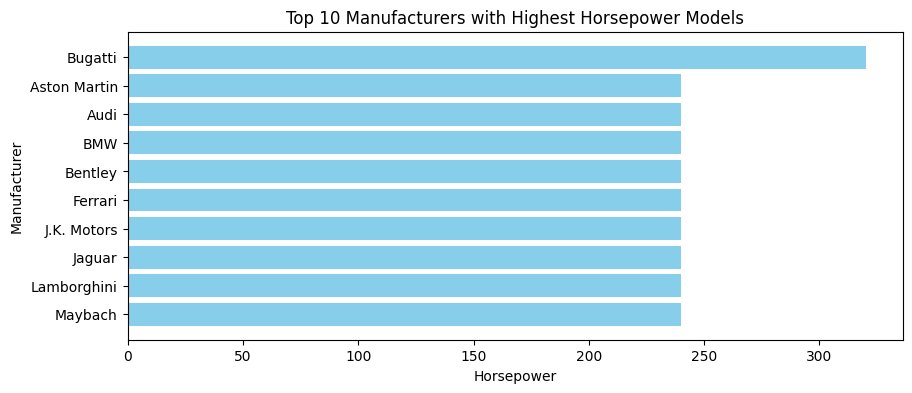

In [280]:
# Assuming df is your DataFrame with columns including 'Make' and 'Horsepower'
# Group the DataFrame by 'Make' and calculate the maximum horsepower for each manufacturer
top_10_manufacturers = df.groupby('Make')['Horsepower'].max().nlargest(10)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 4))
plt.barh(top_10_manufacturers.index, top_10_manufacturers.values, color='skyblue')
plt.xlabel('Horsepower')
plt.ylabel('Manufacturer')
plt.title('Top 10 Manufacturers with Highest Horsepower Models')
plt.gca().invert_yaxis()  # Invert y-axis to have the manufacturer with the highest horsepower at the top
plt.show()

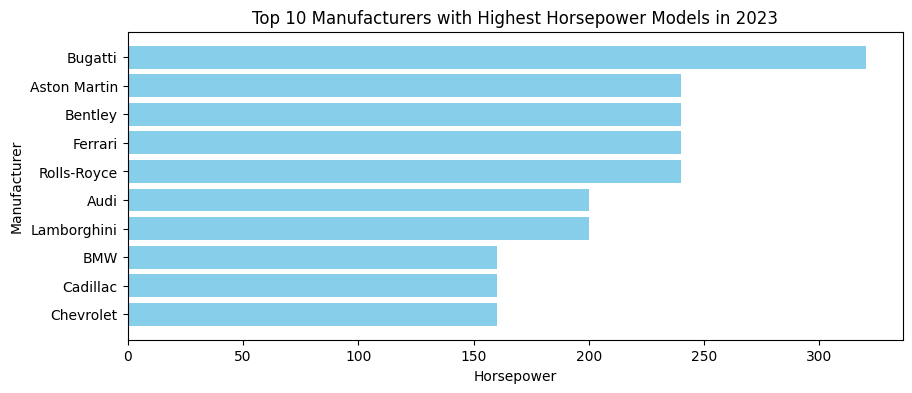

In [281]:
# Assuming df is your DataFrame with columns including 'Make', 'Model Year', and 'Horsepower'
# Filter the DataFrame for the year 2023
df_2023 = df[df['Model Year'] == 2023]

# Group the filtered DataFrame by 'Make' and calculate the maximum horsepower for each manufacturer
top_10_manufacturers_2023 = df_2023.groupby('Make')['Horsepower'].max().nlargest(10)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 4))
plt.barh(top_10_manufacturers_2023.index, top_10_manufacturers_2023.values, color='skyblue')
plt.xlabel('Horsepower')
plt.ylabel('Manufacturer')
plt.title('Top 10 Manufacturers with Highest Horsepower Models in 2023')
plt.gca().invert_yaxis()  # Invert y-axis to have the manufacturer with the highest horsepower at the top
plt.show()

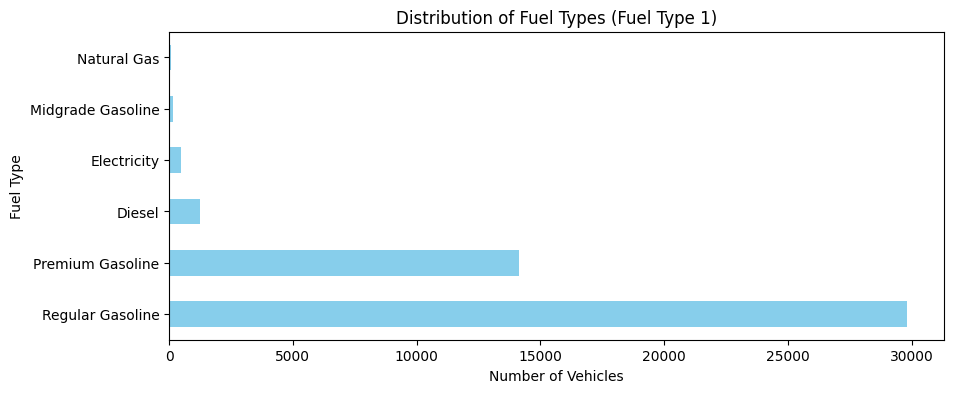

In [282]:
# Assuming df is your DataFrame containing the dataset
# Count the occurrences of each fuel type in the "Fuel Type 1" column
fuel_type_counts = df['Fuel Type 1'].value_counts()

# Check if there are any entries with no fuel type specified
no_fuel_count = df['Fuel Type 1'].isna().sum()

# If there are entries with no fuel type specified, add it to the counts
if no_fuel_count > 0:
    fuel_type_counts['No Fuel'] = no_fuel_count

# Sort the fuel type counts in descending order
fuel_type_counts = fuel_type_counts.sort_values(ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 4))
fuel_type_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Vehicles')
plt.ylabel('Fuel Type')
plt.title('Distribution of Fuel Types (Fuel Type 1)')
plt.show()

In [283]:
df.head()

,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,Engine Cylinders,Engine Displacement,Drive,Engine Description,Transmission,Fuel Efficiency (MPG),Fuel Consumption (gallons/mile),Carbon Emissions (g/mile),Horsepower
0,1985,Alfa Romeo,Spider Veloce 2000,14.167143,Regular Gasoline,4.0,2.0,Rear-Wheel Drive,(FFS),Manual 5-spd,21,0.038814,0.036226,80.0
1,1985,Bertone,X1/9,13.523182,Regular Gasoline,4.0,1.5,Rear-Wheel Drive,NaN,Manual 5-spd,22,0.037050,0.033008,80.0
2,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,8.0,5.7,Rear-Wheel Drive,(350 V8) (FFS),Automatic 4-spd,17,0.047947,0.055280,160.0
3,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,8.0,5.7,Rear-Wheel Drive,(350 V8) (FFS),Manual 4-spd,17,0.047947,0.055280,160.0
4,1985,Nissan,300ZX,18.594375,Regular Gasoline,6.0,3.0,Rear-Wheel Drive,"(GUZZLER) (FFS,TRBO)",Automatic 4-spd,16,0.050943,0.062406,120.0


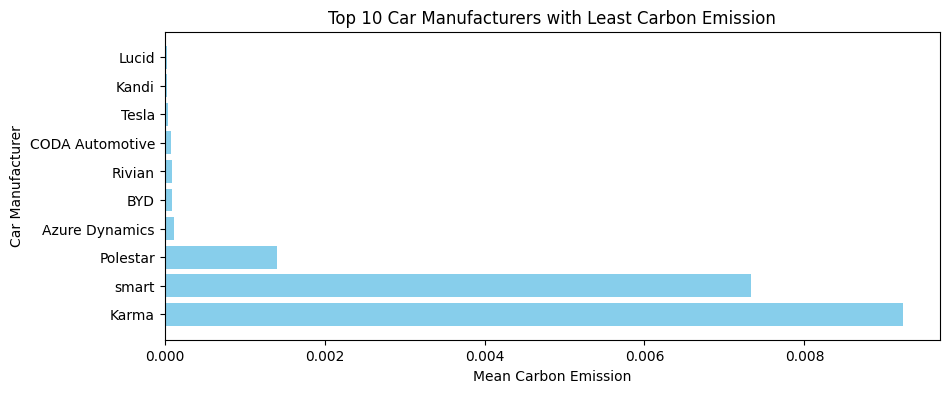

In [284]:
# Group the DataFrame by 'Make' and calculate the mean carbon emission
company_carbon = df.groupby('Make')['Carbon Emissions (g/mile)'].mean()

# Sort the car companies based on mean carbon emission in ascending order
company_carbon_sorted = company_carbon.sort_values(ascending=True)

# Get the top 10 car companies with the least carbon emission
top_10 = company_carbon_sorted.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 4))
plt.barh(top_10.index, top_10.values, color='skyblue')
plt.xlabel('Mean Carbon Emission')
plt.ylabel('Car Manufacturer')
plt.title('Top 10 Car Manufacturers with Least Carbon Emission')
plt.gca().invert_yaxis()  # Invert y-axis to have the manufacturer with the least carbon emission at the top
plt.show()

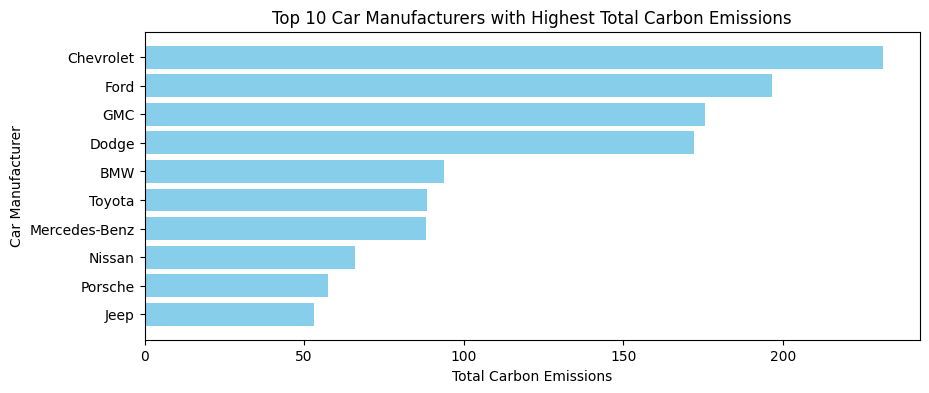

In [285]:
# Group the DataFrame by 'Make' and sum the carbon emissions
company_emissions = df.groupby('Make')['Carbon Emissions (g/mile)'].sum()

# Sort car companies based on total carbon emissions in descending order
sorted_companies = company_emissions.sort_values(ascending=False)

# Select the top 10 car companies with the highest carbon emissions
top_10_companies = sorted_companies.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 4))
plt.barh(top_10_companies.index, top_10_companies.values, color='skyblue')
plt.xlabel('Total Carbon Emissions')
plt.ylabel('Car Manufacturer')
plt.title('Top 10 Car Manufacturers with Highest Total Carbon Emissions')
plt.gca().invert_yaxis()  # Invert y-axis to have the manufacturer with the highest total carbon emissions at the top
plt.show()


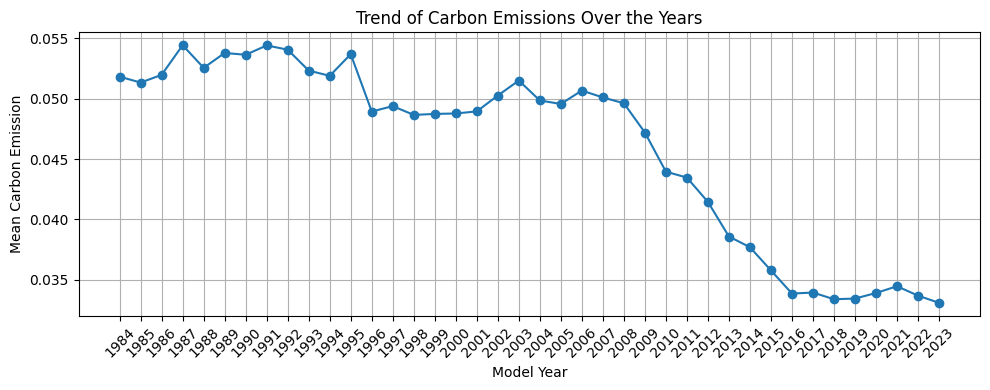

In [286]:
# Group the data by 'Model Year' and calculate the mean carbon emission for each year
mean_emission_by_year = df.groupby('Model Year')['Carbon Emissions (g/mile)'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 4))
plt.plot(mean_emission_by_year.index, mean_emission_by_year.values, marker='o', linestyle='-')
plt.title('Trend of Carbon Emissions Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Mean Carbon Emission')
plt.grid(True)
plt.xticks(mean_emission_by_year.index, rotation=45)
plt.tight_layout()
plt.show()


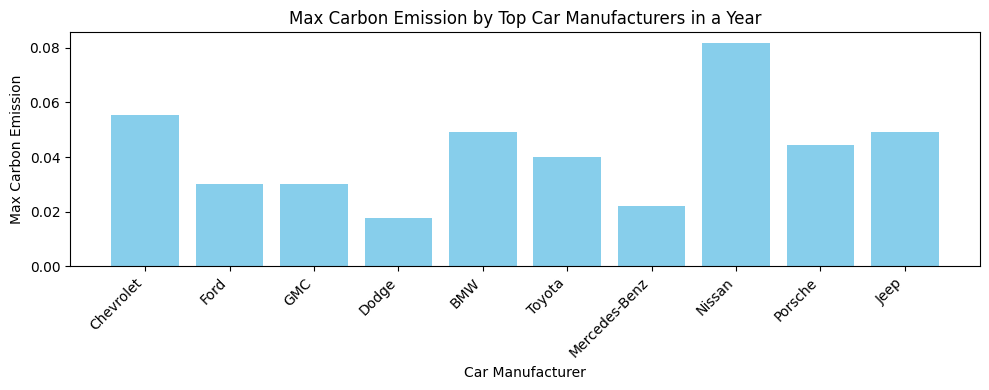

In [287]:
# Group the data by 'Model Year' and calculate the mean carbon emission for each year
mean_emission_by_year = df.groupby('Model Year')['Carbon Emissions (g/mile)'].mean()

# Find the top companies emitting large amounts of carbon emissions
top_companies = df.groupby('Make')['Carbon Emissions (g/mile)'].sum().nlargest(10).index.tolist()

# Initialize lists to store data for the bar graph
years = []
max_emissions = []

# Iterate over the top companies to collect data
for company in top_companies:
    max_emission_year = df[df['Make'] == company].groupby('Model Year')['Carbon Emissions (g/mile)'].sum().idxmax()
    max_emission = df[(df['Make'] == company) & (df['Model Year'] == max_emission_year)]['Carbon Emissions (g/mile)'].iloc[0]
    years.append(max_emission_year)
    max_emissions.append(max_emission)

# Plotting the bar graph
plt.figure(figsize=(10, 4))
plt.bar(top_companies, max_emissions, color='skyblue')
plt.xlabel('Car Manufacturer')
plt.ylabel('Max Carbon Emission')
plt.title('Max Carbon Emission by Top Car Manufacturers in a Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


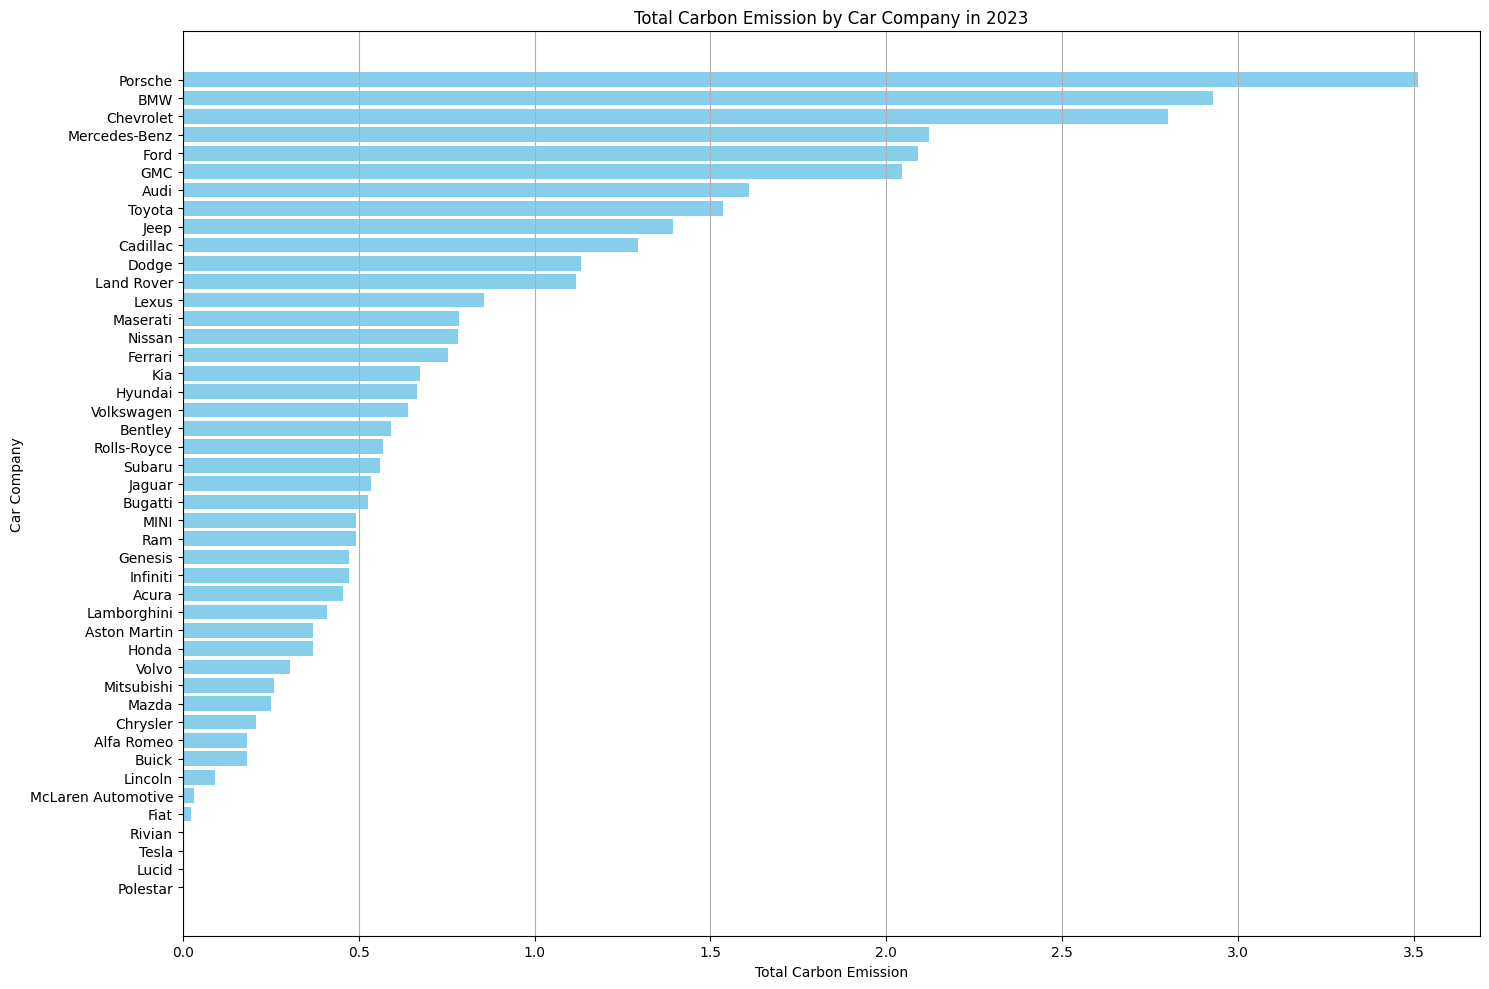

In [288]:
# Filter the data for the year 2023
df_2023 = df[df['Model Year'] == 2023]

# Group the data by car company and calculate the total carbon emission for each company
total_emission_by_company = df_2023.groupby('Make')['Carbon Emissions (g/mile)'].sum()

# Sort the companies based on total carbon emission in ascending order
sorted_companies = total_emission_by_company.sort_values()

# Plotting the horizontal bar graph
plt.figure(figsize=(15, 10))
plt.barh(sorted_companies.index, sorted_companies.values, color='skyblue')
plt.title('Total Carbon Emission by Car Company in 2023')
plt.xlabel('Total Carbon Emission')
plt.ylabel('Car Company')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

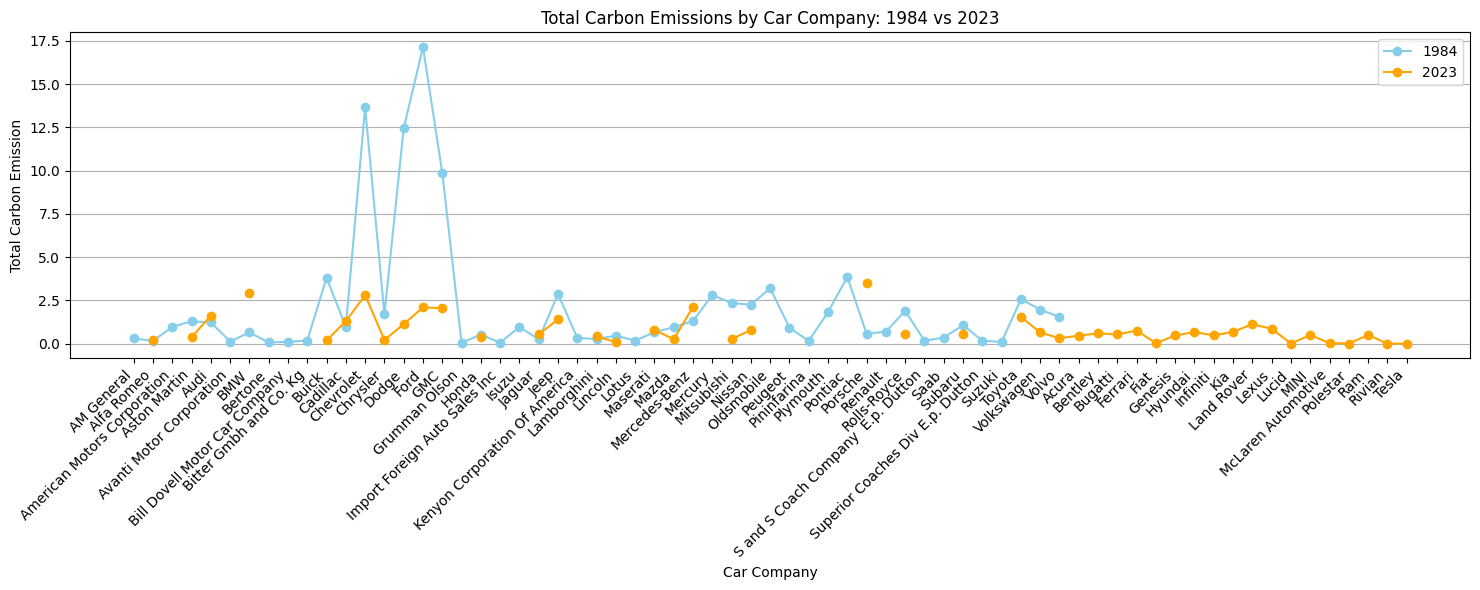

In [289]:

# Filter the data for the year 1984
df_1984 = df[df['Model Year'] == 1984]

# Group the data by car company and calculate the total carbon emission for each company in 1984
total_emission_1984 = df_1984.groupby('Make')['Carbon Emissions (g/mile)'].sum()

# Filter the data for the year 2023
df_2023 = df[df['Model Year'] == 2023]

# Group the data by car company and calculate the total carbon emission for each company in 2023
total_emission_2023 = df_2023.groupby('Make')['Carbon Emissions (g/mile)'].sum()

# Merge the data for 1984 and 2023 into a single DataFrame
comparison_df = pd.concat([total_emission_1984, total_emission_2023], axis=1)
comparison_df.columns = ['Total Emission 1984', 'Total Emission 2023']

# Plotting the comparison line chart
plt.figure(figsize=(15, 6))
plt.plot(comparison_df.index, comparison_df['Total Emission 1984'], marker='o', label='1984', color='skyblue')
plt.plot(comparison_df.index, comparison_df['Total Emission 2023'], marker='o', label='2023', color='orange')
plt.title('Total Carbon Emissions by Car Company: 1984 vs 2023')
plt.xlabel('Car Company')
plt.ylabel('Total Carbon Emission')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


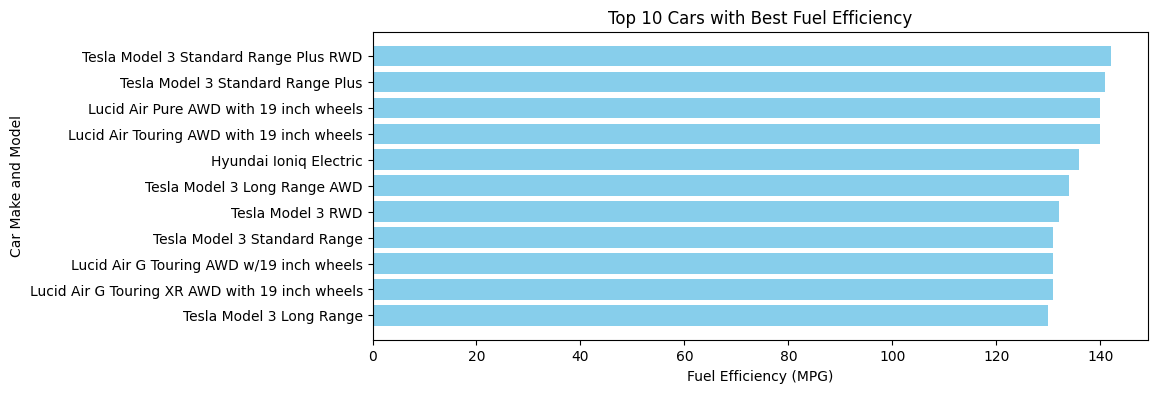

In [290]:
# Selecting important columns
selected_columns = ['Make', 'Model', 'Fuel Efficiency (MPG)']

# Extracting data with selected columns
selected_data = df[selected_columns]

# Sorting data by fuel efficiency in descending order and selecting top 10
top_10 = selected_data.nlargest(20, 'Fuel Efficiency (MPG)')

# Creating a vertical bar graph
plt.figure(figsize=(10, 4))
plt.barh(top_10['Make'] + ' ' + top_10['Model'], top_10['Fuel Efficiency (MPG)'], color='skyblue')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Car Make and Model')
plt.title('Top 10 Cars with Best Fuel Efficiency')
plt.gca().invert_yaxis()  # Invert y-axis to show highest efficiency at the top
plt.show()

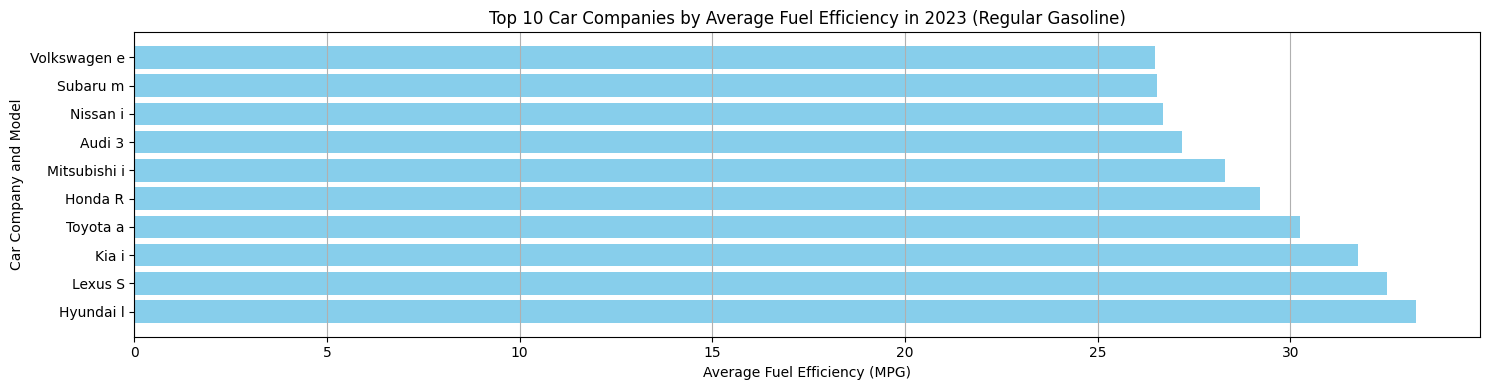

In [291]:
# Filter the data for the year 2023 and vehicles using premium gasoline
df_2023_premium_gasoline = df_2023[df_2023['Fuel Type 1'] == 'Regular Gasoline']

# Group the filtered data by car company and model, and calculate the average fuel efficiency for each combination
average_fuel_efficiency_by_company_model_premium = df_2023_premium_gasoline.groupby(['Make', 'Model'])['Fuel Efficiency (MPG)'].mean()

# Calculate the average fuel efficiency for each car company
average_fuel_efficiency_by_company_premium = average_fuel_efficiency_by_company_model_premium.groupby('Make').mean()

# Sort the companies based on average fuel efficiency in descending order
sorted_companies_fuel_efficiency_premium = average_fuel_efficiency_by_company_premium.sort_values(ascending=False)

# Selecting only the top 10 car companies
top_10_companies_fuel_efficiency_premium = sorted_companies_fuel_efficiency_premium.head(10)

# Plotting the horizontal bar graph for the top 10 companies and models using premium gasoline
plt.figure(figsize=(15, 4))
plt.barh(top_10_companies_fuel_efficiency_premium.index + ' ' + top_10_companies_fuel_efficiency_premium.index.map(lambda x: average_fuel_efficiency_by_company_model_premium[x].idxmax()[1]), 
         top_10_companies_fuel_efficiency_premium.values, color='skyblue')
plt.title('Top 10 Car Companies by Average Fuel Efficiency in 2023 (Regular Gasoline)')
plt.xlabel('Average Fuel Efficiency (MPG)')
plt.ylabel('Car Company and Model')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


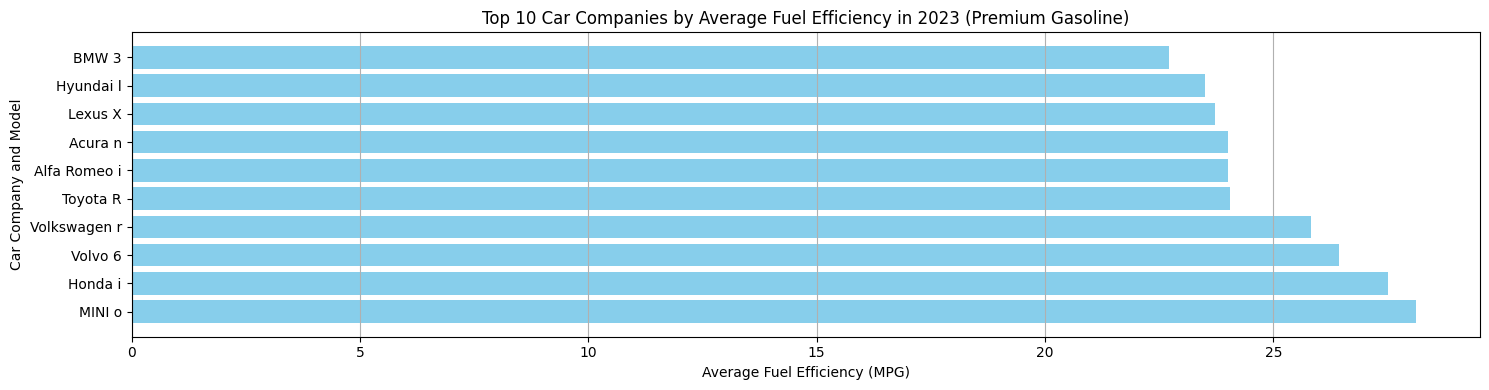

In [292]:
# Filter the data for the year 2023 and vehicles using premium gasoline
df_2023_premium_gasoline = df_2023[df_2023['Fuel Type 1'] == 'Premium Gasoline']

# Group the filtered data by car company and model, and calculate the average fuel efficiency for each combination
average_fuel_efficiency_by_company_model_premium = df_2023_premium_gasoline.groupby(['Make', 'Model'])['Fuel Efficiency (MPG)'].mean()

# Calculate the average fuel efficiency for each car company
average_fuel_efficiency_by_company_premium = average_fuel_efficiency_by_company_model_premium.groupby('Make').mean()

# Sort the companies based on average fuel efficiency in descending order
sorted_companies_fuel_efficiency_premium = average_fuel_efficiency_by_company_premium.sort_values(ascending=False)

# Selecting only the top 10 car companies
top_10_companies_fuel_efficiency_premium = sorted_companies_fuel_efficiency_premium.head(10)

# Plotting the horizontal bar graph for the top 10 companies and models using premium gasoline
plt.figure(figsize=(15, 4))
plt.barh(top_10_companies_fuel_efficiency_premium.index + ' ' + top_10_companies_fuel_efficiency_premium.index.map(lambda x: average_fuel_efficiency_by_company_model_premium[x].idxmax()[1]), 
         top_10_companies_fuel_efficiency_premium.values, color='skyblue')
plt.title('Top 10 Car Companies by Average Fuel Efficiency in 2023 (Premium Gasoline)')
plt.xlabel('Average Fuel Efficiency (MPG)')
plt.ylabel('Car Company and Model')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


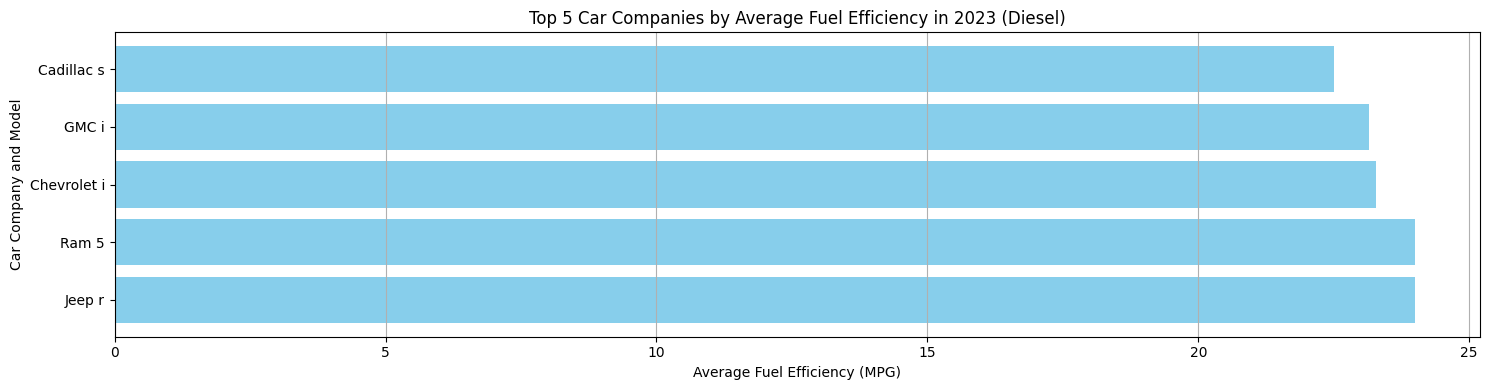

In [293]:
# Filter the data for the year 2023 and vehicles using diesel fuel
df_2023_diesel = df_2023[df_2023['Fuel Type 1'] == 'Diesel']

# Group the filtered data by car company and model, and calculate the average fuel efficiency for each combination
average_fuel_efficiency_by_company_model_diesel = df_2023_diesel.groupby(['Make', 'Model'])['Fuel Efficiency (MPG)'].mean()

# Calculate the average fuel efficiency for each car company
average_fuel_efficiency_by_company_diesel = average_fuel_efficiency_by_company_model_diesel.groupby('Make').mean()

# Sort the companies based on average fuel efficiency in descending order
sorted_companies_fuel_efficiency_diesel = average_fuel_efficiency_by_company_diesel.sort_values(ascending=False)

# Selecting only the top 10 car companies
top_10_companies_fuel_efficiency_diesel = sorted_companies_fuel_efficiency_diesel.head(5)

# Plotting the horizontal bar graph for the top 10 companies and models using diesel fuel
plt.figure(figsize=(15, 4))
plt.barh(top_10_companies_fuel_efficiency_diesel.index + ' ' + top_10_companies_fuel_efficiency_diesel.index.map(lambda x: average_fuel_efficiency_by_company_model_diesel[x].idxmax()[1]), 
         top_10_companies_fuel_efficiency_diesel.values, color='skyblue')
plt.title('Top 5 Car Companies by Average Fuel Efficiency in 2023 (Diesel)')
plt.xlabel('Average Fuel Efficiency (MPG)')
plt.ylabel('Car Company and Model')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45896 entries, 0 to 45895
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Model Year                                       45896 non-null  int64  
 1   Make                                             45896 non-null  object 
 2   Model                                            45896 non-null  object 
 3   Estimated Annual Petrolum Consumption (Barrels)  45896 non-null  float64
 4   Fuel Type 1                                      45896 non-null  object 
 5   Engine Cylinders                                 45409 non-null  float64
 6   Engine Displacement                              45411 non-null  float64
 7   Drive                                            44710 non-null  object 
 8   Engine Description                               28865 non-null  object 
 9   Transmission                

In [295]:
df.shape


(45896, 14)

In [296]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45896 entries, 0 to 45895
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Model Year                                       45896 non-null  int64  
 1   Make                                             45896 non-null  object 
 2   Model                                            45896 non-null  object 
 3   Estimated Annual Petrolum Consumption (Barrels)  45896 non-null  float64
 4   Fuel Type 1                                      45896 non-null  object 
 5   Engine Cylinders                                 45409 non-null  float64
 6   Engine Displacement                              45411 non-null  float64
 7   Drive                                            44710 non-null  object 
 8   Engine Description                               28865 non-null  object 
 9   Transmission                

In [297]:
df.describe(include='all')


,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,Engine Cylinders,Engine Displacement,Drive,Engine Description,Transmission,Fuel Efficiency (MPG),Fuel Consumption (gallons/mile),Carbon Emissions (g/mile),Horsepower
count,45896.000000,45896,45896,45896.000000,45896,45409.000000,45411.000000,44710,28865,45885,45896.000000,45896.000000,45896.000000,45409.000000
unique,NaN,141,4762,NaN,6,NaN,NaN,7,589,40,NaN,NaN,NaN,NaN
top,NaN,Chevrolet,F150 Pickup 2WD,NaN,Regular Gasoline,NaN,NaN,Front-Wheel Drive,(FFS),Automatic 4-spd,NaN,NaN,NaN,NaN
freq,NaN,4333,233,NaN,29805,NaN,NaN,15204,8827,11048,NaN,NaN,NaN,NaN
mean,2003.608375,NaN,NaN,15.328113,NaN,5.710674,3.281066,NaN,NaN,NaN,21.326150,0.041995,0.045613,114.213482
std,12.189427,NaN,NaN,4.336282,NaN,1.772177,1.357082,NaN,NaN,NaN,9.777408,0.011880,0.025379,35.443535
min,1984.000000,NaN,NaN,0.047081,NaN,2.000000,0.000000,NaN,NaN,NaN,7.000000,0.000129,0.000022,40.000000
25%,1992.000000,NaN,NaN,12.935217,NaN,4.000000,2.200000,NaN,NaN,NaN,17.000000,0.035439,0.030200,80.000000
50%,2005.000000,NaN,NaN,14.875500,NaN,6.000000,3.000000,NaN,NaN,NaN,20.000000,0.040755,0.039940,120.000000
75%,2015.000000,NaN,NaN,17.500588,NaN,6.000000,4.200000,NaN,NaN,NaN,23.000000,0.047947,0.055280,120.000000


In [298]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Display the shape of the DataFrame to check the number of rows after dropping duplicates
print("Shape of DataFrame after dropping duplicates:", df.shape)


Shape of DataFrame after dropping duplicates: (45481, 14)


In [299]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [300]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer for numerical columns with mean strategy
num_imputer = SimpleImputer(strategy='mean')

# Impute missing values in numerical columns with mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Initialize SimpleImputer for categorical columns with mode strategy
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Display the number of remaining missing values
print("Number of missing values after imputation:")
print(df.isnull().sum())


Number of missing values after imputation:
Model Year                                         0
Make                                               0
Model                                              0
Estimated Annual Petrolum Consumption (Barrels)    0
Fuel Type 1                                        0
Engine Cylinders                                   0
Engine Displacement                                0
Drive                                              0
Engine Description                                 0
Transmission                                       0
Fuel Efficiency (MPG)                              0
Fuel Consumption (gallons/mile)                    0
Carbon Emissions (g/mile)                          0
Horsepower                                         0
dtype: int64


In [301]:
df.nunique()


Model Year                                           40
Make                                                141
Model                                              4762
Estimated Annual Petrolum Consumption (Barrels)     284
Fuel Type 1                                           6
Engine Cylinders                                     10
Engine Displacement                                  67
Drive                                                 7
Engine Description                                  589
Transmission                                         40
Fuel Efficiency (MPG)                               122
Fuel Consumption (gallons/mile)                     284
Carbon Emissions (g/mile)                           351
Horsepower                                           10
dtype: int64

In [302]:
print(df.columns)


Index(['Model Year', 'Make', 'Model',
       'Estimated Annual Petrolum Consumption (Barrels)', 'Fuel Type 1',
       'Engine Cylinders', 'Engine Displacement', 'Drive',
       'Engine Description', 'Transmission', 'Fuel Efficiency (MPG)',
       'Fuel Consumption (gallons/mile)', 'Carbon Emissions (g/mile)',
       'Horsepower'],
      dtype='object')


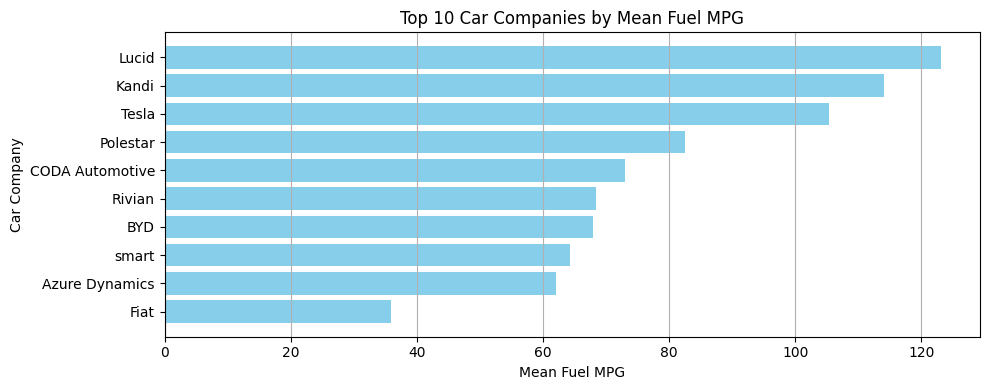

In [303]:
# Group the DataFrame by 'Make' (car company) and calculate the mean Fuel MPG for each company
mean_mpg_by_company = df.groupby('Make')['Fuel Efficiency (MPG)'].mean()

# Sort car companies based on mean Fuel MPG in descending order
sorted_companies = mean_mpg_by_company.sort_values(ascending=False)

# Select the top 10 car companies with the highest mean Fuel MPG
top_10_companies = sorted_companies.head(10)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 4))
plt.barh(top_10_companies.index, top_10_companies.values, color='skyblue')
plt.xlabel('Mean Fuel MPG')
plt.ylabel('Car Company')
plt.title('Top 10 Car Companies by Mean Fuel MPG')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest mean Fuel MPG at the top
plt.grid(axis='x')  # Add grid lines along the x-axis
plt.tight_layout()
plt.show()


In [304]:
pip install category_encoders

In [305]:
import category_encoders as ce
# Get the list of categorical columns excluding 'price_category' and 'price_per_sqft_category'
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns


Index(['Make', 'Model', 'Fuel Type 1', 'Drive', 'Engine Description',
       'Transmission'],
      dtype='object')

In [306]:
# Initialize TargetEncoder
target_encoder = ce.TargetEncoder(cols=categorical_columns)
target_encoder


TargetEncoder(cols=Index(['Make', 'Model', 'Fuel Type 1', 'Drive', 'Engine Description',
       'Transmission'],
      dtype='object'))

In [307]:
# Fit and transform the data using target encoding
data_encoded = target_encoder.fit_transform(df[categorical_columns], df['Fuel Efficiency (MPG)'])
data_encoded


,Make,Model,Fuel Type 1,Drive,Engine Description,Transmission
0,21.700721,21.298496,20.675808,18.556237,21.583476,21.811398
1,21.491586,21.491586,20.675808,18.556237,21.583476,21.811398
2,19.221544,18.169283,20.675808,18.556237,13.619898,18.106075
3,19.221544,18.169283,20.675808,18.556237,13.619898,19.162596
4,22.809643,18.174877,20.675808,18.556237,15.536619,18.106075
...,...,...,...,...,...,...
45891,19.672872,27.686247,97.654959,25.442187,21.583476,96.250000
45892,19.672872,27.969949,97.654959,25.442187,21.583476,96.250000
45893,19.847130,28.593169,97.654959,25.442187,21.583476,96.250000
45894,19.847130,31.715773,97.654959,25.442187,21.583476,96.250000


In [308]:
# Update the original DataFrame with the encoded categorical columns
df[categorical_columns] = data_encoded

# Display the updated DataFrame
print("Updated DataFrame with Target Encoding:")
df.head()


Updated DataFrame with Target Encoding:


,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,Engine Cylinders,Engine Displacement,Drive,Engine Description,Transmission,Fuel Efficiency (MPG),Fuel Consumption (gallons/mile),Carbon Emissions (g/mile),Horsepower
0,1985.0,21.700721,21.298496,14.167143,20.675808,4.0,2.0,18.556237,21.583476,21.811398,21.0,0.038814,0.036226,80.0
1,1985.0,21.491586,21.491586,13.523182,20.675808,4.0,1.5,18.556237,21.583476,21.811398,22.0,0.037050,0.033008,80.0
2,1985.0,19.221544,18.169283,17.500588,20.675808,8.0,5.7,18.556237,13.619898,18.106075,17.0,0.047947,0.055280,160.0
3,1985.0,19.221544,18.169283,17.500588,20.675808,8.0,5.7,18.556237,13.619898,19.162596,17.0,0.047947,0.055280,160.0
4,1985.0,22.809643,18.174877,18.594375,20.675808,6.0,3.0,18.556237,15.536619,18.106075,16.0,0.050943,0.062406,120.0


In [309]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale all columns except 'car name'
df_scaled = df.copy()  # Create a copy of the DataFrame
df_scaled[df_scaled.columns[:-1]] = scaler.fit_transform(df_scaled[df_scaled.columns[:-1]])

# Display the scaled DataFrame
df_scaled


,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,Engine Cylinders,Engine Displacement,Drive,Engine Description,Transmission,Fuel Efficiency (MPG),Fuel Consumption (gallons/mile),Carbon Emissions (g/mile),Horsepower
0,0.025641,0.100930,0.310088,0.332594,0.036947,0.142857,0.238095,0.206183,0.309729,0.080370,0.103704,0.332594,0.111052,80.000000
1,0.025641,0.098680,0.316441,0.317426,0.036947,0.142857,0.178571,0.206183,0.309729,0.080370,0.111111,0.317426,0.101180,80.000000
2,0.025641,0.074257,0.207122,0.411112,0.036947,0.428571,0.678571,0.206183,0.049721,0.034593,0.074074,0.411112,0.169495,160.000000
3,0.025641,0.074257,0.207122,0.411112,0.036947,0.428571,0.678571,0.206183,0.049721,0.047646,0.074074,0.411112,0.169495,160.000000
4,0.025641,0.112861,0.207306,0.436876,0.036947,0.285714,0.357143,0.206183,0.112302,0.034593,0.066667,0.436876,0.191352,120.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,1.000000,0.079113,0.520274,0.001774,1.000000,0.264861,0.390197,1.000000,0.309729,1.000000,0.437037,0.001774,0.000239,114.160999
45892,1.000000,0.079113,0.529609,0.001661,1.000000,0.264861,0.390197,1.000000,0.309729,1.000000,0.451852,0.001661,0.000218,114.160999
45893,0.974359,0.080988,0.550115,0.001378,1.000000,0.264861,0.390197,1.000000,0.309729,1.000000,0.518519,0.001378,0.000159,114.160999
45894,0.974359,0.080988,0.652863,0.000757,1.000000,0.264861,0.390197,1.000000,0.309729,1.000000,0.696296,0.000757,0.000062,114.160999


In [310]:
from sklearn.model_selection import train_test_split

# Define features and target
features = df.drop(['Fuel Efficiency (MPG)'], axis=1)  # Exclude the 'mpg' column from features
target = df['Fuel Efficiency (MPG)']  # Set the 'mpg' column as the target

# Splitting the data into training and validation sets (place this outside the function)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Display the shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (36384, 13)
y_train shape: (36384,)
X_test shape: (9097, 13)
y_test shape: (9097,)


In [311]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def train_regression_model(X_train, y_train, X_test, y_test, epochs=100, l2_penalty=0.01):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_penalty)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_penalty)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mape'])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, 
                        validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

    return model, history

# Assuming X_train, y_train, X_test, y_test are already defined
best_model, history = train_regression_model(X_train, y_train, X_test, y_test, epochs=100, l2_penalty=0.01)


Epoch 1/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 315.8837 - mape: 68.2245 - val_loss: 22.3058 - val_mape: 16.4117
Epoch 2/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.1086 - mape: 16.0725 - val_loss: 11.6671 - val_mape: 9.3550
Epoch 3/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14.5498 - mape: 11.7751 - val_loss: 9.2871 - val_mape: 7.4025
Epoch 4/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12.5835 - mape: 10.2370 - val_loss: 7.8883 - val_mape: 6.2918
Epoch 5/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11.4951 - mape: 9.5056 - val_loss: 6.8809 - val_mape: 5.5013
Epoch 6/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.7364 - mape: 8.9730 - val_loss: 6.1885 - val_mape: 4.8126
Epoch 7/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.8782 - mape: 8.5940 - val_loss: 5.6923 - val_mape: 4.3202
Epoch 8/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.3468 - mape: 8.2364 - val_loss: 5.2940 - val_mape: 3.9233
Ep

In [312]:
# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Multiply by 100 to get the percentage

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error (MSE): 1.2907884041993292
Mean Absolute Percentage Error (MAPE): 1.564683554239115 %


In [313]:
# Display the summary of the best model
best_model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,301 (216.02 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,868 (144.02 KB)

In [314]:
# Convert the history object to a DataFrame
losses = pd.DataFrame(history.history)
losses.head()


,loss,mape,val_loss,val_mape
0,158.988220,43.897766,22.305794,16.411732
1,19.325985,14.490811,11.667089,9.355001
2,14.212291,11.348883,9.287139,7.402494
3,12.380378,10.110391,7.888258,6.291789
4,11.556109,9.383874,6.880887,5.501287


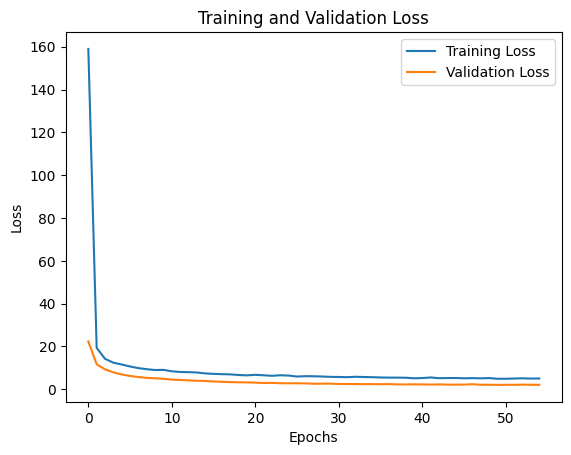

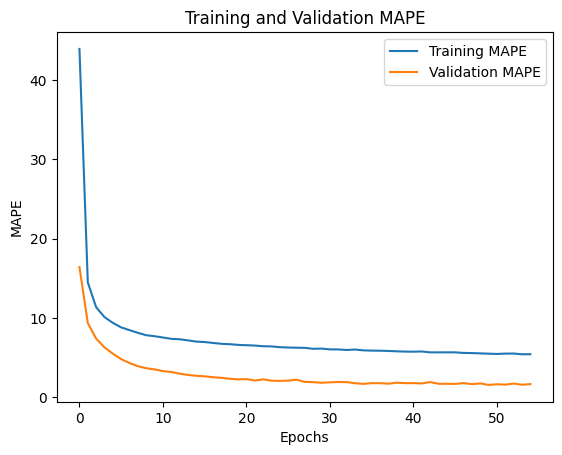

In [315]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation MAPE
plt.plot(history.history['mape'], label='Training MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('Training and Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()

